In [1]:
%cd ../

/Users/jingles/github/torchsignal


In [2]:
from torchsignal.datasets import OPENBMI

s1 = OPENBMI(root="_data/openbmi", subject_id=1, session=1)

print(s1.data.shape)
print(type(s1.data))

(100, 62, 4000)
<class 'numpy.ndarray'>


In [3]:
from torchsignal.filter.channels import pick_channels

selected_channels = ['P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10']

s1_selected_channels = pick_channels(data=s1.data, channel_names=s1.channel_names, selected_channels=selected_channels)

print(s1_selected_channels.shape)

(100, 10, 4000)


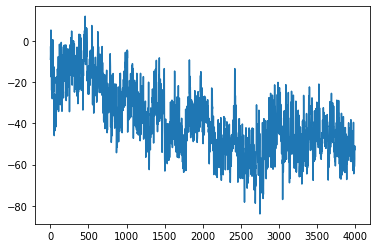

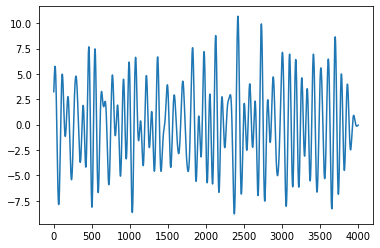

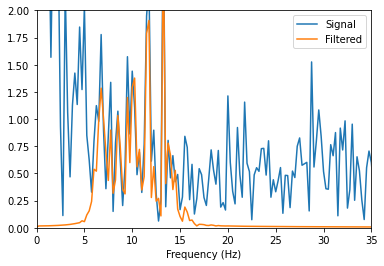

Input: Signal shape (100, 10, 4000)
Output: Signal shape (100, 10, 4000)
(100, 10, 4000)


In [4]:
from torchsignal.filter.butterworth import butter_bandpass_filter

s1_filtered = butter_bandpass_filter(s1_selected_channels, lowcut=6, highcut=15, sample_rate=1000, order=6, verbose=True)

print(s1_filtered.shape)


In [5]:
from torchsignal.datasets.utils import train_test_split

train_dataset, test_dataset = train_test_split(s1_selected_channels, s1.targets)

In [6]:
from torchsignal.datasets.utils import onehot_targets

print('before', train_dataset.targets.shape)
train_dataset_targets = onehot_targets(train_dataset.targets, num_class=4)
print('after', train_dataset_targets.shape)

test_dataset_targets = onehot_targets(test_dataset.targets, num_class=4)


before (75,)
after (75, 4)


In [7]:
train_dataset.set_data_targets(targets=train_dataset_targets)
print(train_dataset.data.shape)
print(train_dataset.targets.shape)
test_dataset.set_data_targets(targets=test_dataset_targets)

(75, 10, 4000)
(75, 4)


In [8]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

In [9]:
for X, y in train_loader:
    print(X.shape)
    print(y.shape)
    break

torch.Size([16, 10, 4000])
torch.Size([16, 4])
